<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°05

## Objetivos de la clase

* Reforzar los conceptos básicos de visualización.

## Contenidos

* [Problema 01](#p1)


## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","company_sales_data.csv"))
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

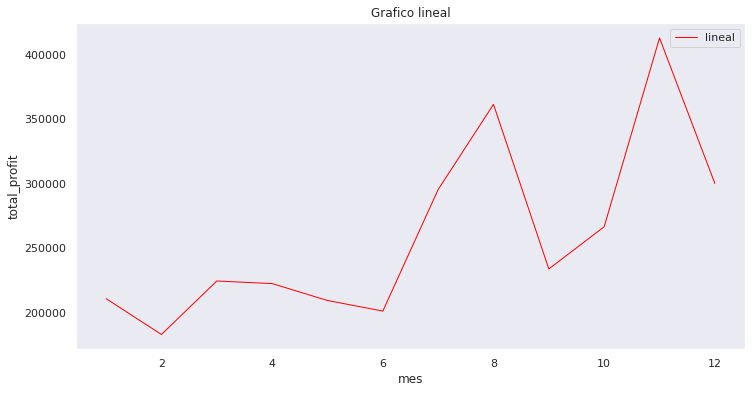

(0.0, 12.55)

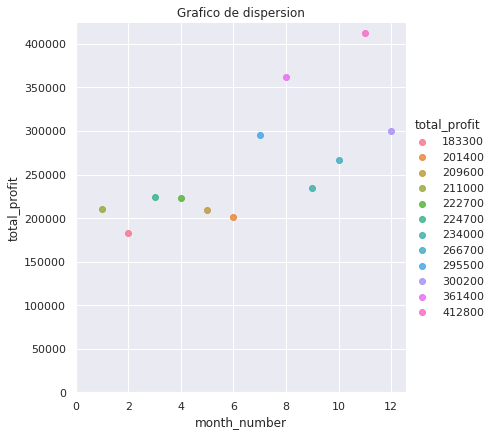

In [3]:
grafico = plt.figure(figsize=(12, 6))   ### Acordamos el tamaño del grafico

plt.plot(
    df['month_number'], # eje x
    df['total_profit'], # eje y
    label='lineal', # etiquetado
    color="red", # color
    linewidth=1 # tamano de la curva
)

plt.legend() # agregar etiquetado
plt.title("Grafico lineal") # agregar titulo
plt.xlabel('mes') # nombre eje x
plt.ylabel('total_profit') # nombre eje y
plt.grid() # agregar grillado     Cuadriculado
plt.show() # mostrar grafico



sns.lmplot(x='month_number',   # eje x 
           y='total_profit',   #eje y
           data=df,            #datos del Dataframe
           fit_reg=False, 
           height=6,           #tamaño
           hue='total_profit') #valores en df['total_profit']

plt.title("Grafico de dispersion") # agregar titulo

plt.ylim(0, None)
plt.xlim(0, None)

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

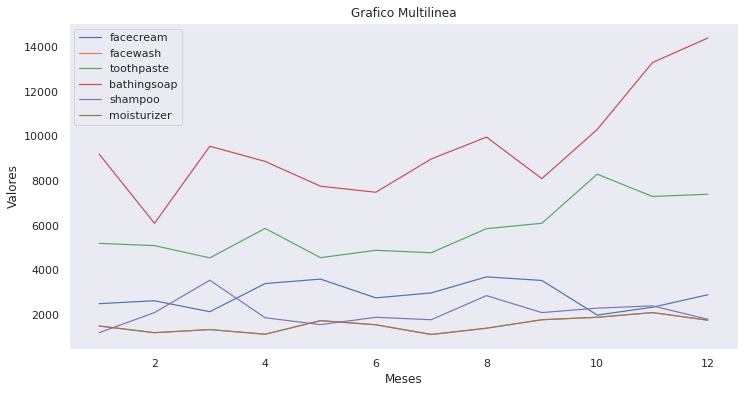

In [4]:
grafico = plt.figure(figsize=(12, 6))   ### Acordamos el tamaño del grafico

productos = df.set_index(['total_profit','total_units','month_number']).columns

### Index de los productos


for product in productos:    ### Recorremos los productos para trazar lineas
    plt.plot(
        df['month_number'], # eje x
        df[product], # eje y
        label = product, # etiquetado
        linewidth = 1.2 # tamano de la curva
    )

plt.legend() # agregar etiquetado
plt.title("Grafico Multilinea") # agregar titulo
plt.xlabel('Meses') # nombre eje x
plt.ylabel('Valores') # nombre eje y
plt.grid() # agregar grillado     Cuadriculado
plt.show() # mostrar grafico

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

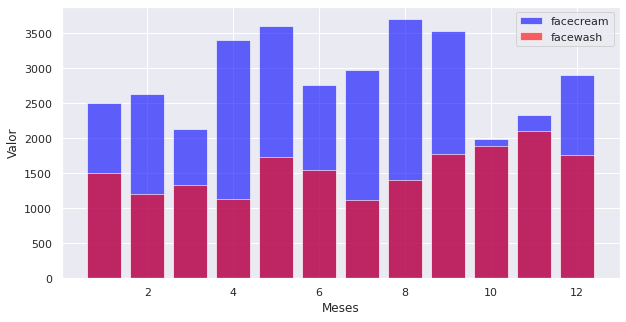

In [5]:
fig = plt.figure(figsize=(10, 5))

plt.bar(
    df['month_number'], # eje x
    df['facecream'], # eje y 
    align='center', # centrar nombre eje x
    color="blue", # color 
    label = 'facecream',
    alpha=0.6 # intensidad del color
)
plt.bar(
    df['month_number'], # eje x
    df['facewash'], # eje y 
    align='center', # centrar nombre eje x
    color="red", # color
    label = 'facewash',
    alpha=0.6 # intensidad del color
)
plt.legend()
plt.ylabel('Valor')
plt.xlabel('Meses')
plt.show()

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

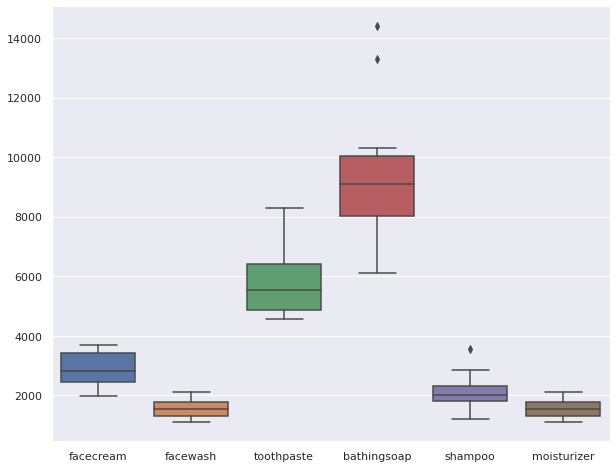

In [6]:
stats_df = df.drop(['month_number','total_profit', 'total_units'], axis=1)
 
### Formamos Dataframe stats_df quitando lo indicado
    
sns.boxplot(data=stats_df)

### Formamos grafico box-plot

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

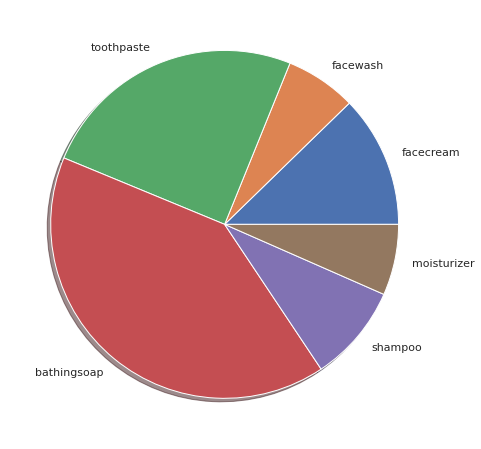

In [7]:
lista = []
for producto in productos:
    lista.append(df[producto].sum())

plt.pie(
    lista, #valores del año
    labels = productos, #nombre productos
    shadow = True
)    
plt.show()